# Logistic Regression: Application

In this notebook, we examine how to apply logistic regression in Python on a sample dataset containing information on whether an indiviudal purchased a product based on multiple variables.

Sources:
1. <a href='https://www.udemy.com/course/machinelearning/'>Machine Learning A-Z™: Hands-On Python & R In Data Science</a>
2. <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>
3. <a href='https://kiwidamien.github.io/are-you-sure-thats-a-probability.html'>Are you sure that's a probability?</a>
4. <a href='https://www.datasciencecentral.com/understanding-type-i-and-type-ii-errors/'>Understanding Type I and Type II Errors</a>

In [1]:
# Import analytical libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import other support
import os

## Load & Preview Data

In [2]:
# Define purchase data file path
purchase_data_file_path = os.path.join('..', 'Data', 'Social_Network_Ads.csv')

# Load purchase data
purchases = pd.read_csv(purchase_data_file_path)

In [3]:
# Preview data
display(purchases.shape)
display(purchases.head())
display(purchases.describe())
display(purchases.isna().sum())

(400, 3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Prepare Data

In [4]:
# Define features and labels
X = purchases.drop(['Purchased'], axis=1).values
y = purchases['Purchased'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [5]:
# Initialize scalar
scaler = StandardScaler()

# Fit scaler to data
scaler.fit(X_train)

# Scale features
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Prepare Classifier

In [6]:
# Initialize regressor object
classifier = LogisticRegression(random_state=0)

# Fit regressor to data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Use Classifier

At this stage we have "built" our machine learning classifier.  Now we will examine how we can use this on an example of an individual who did purchase the product.  Examining our original data, the first case who did not purchase the product is a 27 year old with a salary of 84000, while the first case of someone who did purchase the product is a 32 year old with a salary of 150,000.

In [7]:
# Create example data point
example_0 = np.array([27, 84000])
example_1 = np.array([32, 150000])

examples = np.array([example_0, example_1])

# Scale example datapoint
examples = scaler.transform(examples)

# Predict class for example cases
print(classifier.predict(examples))

[0 1]


Above we see that the first individual was predicted as class 0 (did not purchase the product), while the second individual was predicted as class 1 (did purchase the product).

In addition to using the .predict() method, we may also use the .predict_prob() method, which returns the probability that an observation falls into each class.

In [8]:
print(classifier.predict_proba(examples))

[[0.94139491 0.05860509]
 [0.40700336 0.59299664]]


Above, we see that there is a 94% probabiltiy that the first example falls into class 0, and a 0.06% probability that this example falls into class 1.  In the second example, there is a 41% probability that this case falls into class 0, and a 59% probability that this case falls into class 1.  The probabilities for each case will always sum to 1.  When reading such a probabilties matrix, we can not only predict a datapoint's class, but also determine the confidence in that prediction.  In the first case, we predict that the data point falls into class 0, and we are 94% confident thereof, while in the second case, we predict that the datapoint fall1s into class 1, but we are only 59% confident thereof.

## Examine Classifier Accuracy

There are a number of ways to evaluate the classifier's performance.  Options include observing the accuracy, examining concated predictions and actuals, and using a confusion matrix.  We will first look at accuracy, which simple returns the percentage of correct predictions out of all predicitons made.

In [9]:
# Test classifier
print(classifier.score(X_test, y_test))

0.89


The next method in evaluating the classifier is by concatenating actual values to predicted values.  In doing so, we will view each value side-by-side, to observe for ourselves how often they match.

In [10]:
# Predict purchase class for test points
y_predict = classifier.predict(X_test)

In [11]:
# Get length of predictions array
lenth_of_predictions = len(y_predict)

# Define predicted values and actual test values
y_predict = y_predict.reshape(lenth_of_predictions, 1)
y_test = y_test.reshape(lenth_of_predictions,1)

# Concatenate predicted and actual test values
np.concatenate([y_predict, y_test], axis=1)

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0,

Examining the above, we can examine our predicted value in the first column, and the actual classifiction in the second column.  In fact, see see that the first wrong prediction happens 10 rows in.

Lastly, we can also use a confusion matrix.  A confusion matrix looks as follows:

<table>
    <tr><td colspan=2></td><td colspan=2>Predicted</td></tr>
    <tr><td colspan=2></td><td>0</td><td>1</td></tr>
    <tr><td rowspan=3>Actual</td></tr>
    <tr><td>0</td><td>$a$</td><td>$b$</td></tr>
    <tr><td>1</td><td>$c$</td><td>$d$</td></tr>
</table>

Therefore, the values may be interpreted as follows:
<ul>
    <li>$a$ represents datapoints we classified as 0 (will not purchase the product), and actually did not purchase.</li>
    <li>$b$ represents datapoints we classified as 1 (will purchase the product), but did not actually purchase.</li>
    <li>$c$ represents datapoints we classified as 0, but actually did purchase.</li>
    <li>$d$ represents datapoints we classified as 1, and did actually purchase.</li>
</ul>
    

Illustrated differently, a confusion matrix may be interpreted as follows:

<table>
    <tr><td>correcty predicted first class</td><td>incorrectly predicted second class</td></tr>
    <tr><td>incorrectly predicted first class</td><td>correctly predicted second class</td></tr>
</table>

In [12]:
# Compute confusion matrix
confusion_matrix(y_test, y_predict)

array([[65,  3],
       [ 8, 24]], dtype=int64)

Examining the confusion matrix above, we see that we correctly predicted that 65 individudals would not purchase the product, and correctly predicted that 24 individuals would make the purchase.  We incorrectly predicted that 3 individuals would make the purchase, when they actually did not, and we incorrectly predicted that 8 individuals would not purchase the product, when they actually did.

It is worth noting that in this particular case, we more often "missed someone who would purchased the product" than "tried selling to someone who would not make the purchase."  These are known as "type" errors.  A type 1 error is a false positive; that is, we predicted something to be true (would make the purchase), when it was actually false (would not make the purchase).  A type 2 error is a false negative; that is, we predicted something to be false, when it was actually true$^4$.

Lastly, recall that we have 400 datapoints in this dataset, and we defined the test set to be 25% of the data when splitting; this means that our test set has 100 observations.  If we add our correct predictions, we get 65+24=89, and 89 correct predictions out of 100 is 89%.  This is the accuracy that classifier.predict() returned earlier.  If you know the number of points in your dataset, you can add the number of correct predicitons in a confusion matrix, and divide by the dataset length, to compute the accuracy.

## Visualize Classifier

In addition to returning the confusion matrix values in a numpy array, we can also visualize the confusion matrix using the ConfusionMatrixDisplay class.

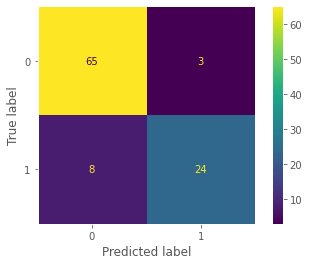

In [13]:
# Define new figure and axis
figure, axis = plt.subplots()
# Turn grid off
axis.grid(False)
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_predict, ax=axis)